# Intro to Statistical Analysis with Python

**Date**: November 7th, 2024

**Author**: Sunny Fang, yf2610

_Created as part of the Barnard College Computing Fellows Program, Fall 2024_


By the end of this workshop, students should be able to...
1. Write well-documented, interpretable code for statistical testing,
2. Interpret and explain statistical test results to an audience,
3. Feel comfortable selecting and implementing the appropriate statistical test for their project,

# 0. Setup

In [1]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install scipy

In [2]:
# to process data
import pandas as pd

# for numerical processing
import numpy as np

# to plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# to carry out statistical testing
from scipy import stats

sns.set_style('darkgrid')

# for datetime processing
import datetime as dt

# 1. Data Preprocessing

Today, we are using an air pollution dataset from [Kaggle](https://www.kaggle.com/datasets/sogun3/uspollution/data).

You can read the file with the following link: `https://drive.google.com/uc?id=1FNWe_pjSONfixgQHPz6o28tpg34Hiwvj`

**IMPORTANT NOTE:** usually files end with .csv, but since we are reading a file from a Google Drive link, it looks a bit different here

In [ ]:
# TODO: replace the filename
# read the dataset using the link provided above
df = pd.read_csv("_____")

# remove max column restriction
pd.set_option("display.max_columns", None)

# display the first 5 rows
df.head(5)

In [ ]:
df_cols = df.columns.to_list()
print(df_cols)

In [ ]:
# Carry out basic data preprocessing techniques
# step 1: drop NaNs
df = df.dropna()

# step 2: drop columns we don't need
# TODO: keep everything *except for* the first 6 columns
# i.e., we don't need: Unnamed: 0.1, Unnamed: 0, State Code,County Code, Site Num, and Address
# there are several right answers to this!
# df = df.iloc[:,6:]
# df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address'])
df.head()

In [6]:
# an important addition: as a good practice, when dealing with datetime objects in a dataframe,
df['Date Local'] = pd.to_datetime(df['Date Local'])

# 2. T-test

### 2.1 One-sample T-test

On October 1, 2015, the Environmental Protection Agency strengthend the National Ambient Air Quality Standards: "areas will meet the standards if the 4th highest daily maximum 8-hour ozone concentration per year, averaged over three years, is **equal to or less than 70 ppb** (or 0.07 ppm) ([source](https://19january2017snapshot.epa.gov/ozone-pollution/2015-revision-2008-ozone-national-ambient-air-quality-standards-naaqs-supporting_.html)).

Here, we want to test whether or not the state of Califronia (CA) meets the standard. For the purpose of this demonstration, we are going to loosen the "4th highest daily maximum 8-hour ozone concentration per year" assumption. Instead, we are going to see if the **average of the max O3 value across three years** meet the standards.

**Resources**:
- [How to filter by year](https://stackoverflow.com/questions/46878156/pandas-filter-dataframe-rows-with-a-specific-year)


#### step 1: **data slicing**

In [ ]:
# TODO: let's subset the data together!
# step 1: subset the data to get our desired output
# note: here, we subset for "O3 1st Max Value",
# but we can also use "O3 Mean" depending on our research question
# 1a: subset the dataset, keeping California only, name it 'ca'
ca = df[___]

# 1b: subset 'ca' to keep data where year is after 2011 (inclusive), name it 'ca_2011'
ca_2011 = ca[___]

# 1c: subset 'ca_2011' to keep data where year is before 2013 (inclusive), name it 'ca_2011_2013'
ca_2011_2013 = ca_2011[___]

# 1d: last but not least, we can just keep the columns we want
ca_2011_2013 = ca_2011_2013[['Date Local', 'O3 1st Max Value']]

# alternatively, we can write all of this in one line!
# ca_2011_2013 = df[(df['State'] == 'California') & ((df['Date Local'].dt.year >= 2011) & (df['Date Local'].dt.year <= 2013))][['Date Local','O3 1st Max Value']]

# optional but highly recommended: rename columns for easier access
ca_2011_2013 = ca_2011_2013.rename(columns={"Date Local": "date",
                                            "O3 1st Max Value": "o3"})

# always a good idea to check the data
display(ca_2011_2013.head())

# TODO: save file
ca_2011_2013.to_csv("filename")
# if using Google colab:
# from google.colab import files
# files.download ("filename")

#### step 2: **define hypotheses**

Before we jump into data analysis, take a moment and formulate our null and alternative hypotheses:

- Null hypothesis ($H_0$): The mean value of the average daily ozone concentration in CA is 0.07.

- Alternative Hypothesis ($H_A$): The mean value of the average daily ozone concentration in CA is greater than 0.07.

#### step 3: **define $\alpha$ (significance level)**

Typically, $\alpha$ is set to be 0.05.

#### optional step: **data visualization**

What does the null and alternative hypothesis mean?

In [ ]:
# parameters
null_mean = 0.07
sample_std = 0.015
n = 1000

# generate x values for the plot
x = np.linspace(0.01, 0.13, 1000)

# calculate the normal distribution PDF
y = stats.norm.pdf(x, loc=null_mean, scale=sample_std)

# declare the figure
fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi = 400)

# plot the null hypothesis distribution for all three graphs
ax[0].plot(x, y, label='H₀ Distribution', color='olive')
ax[1].plot(x, y, label='H₀ Distribution', color='olive')
ax[2].plot(x, y, label='H₀ Distribution', color='olive')

# === two tailed test ===
# i.e., if HA is μ ≠ μ0
lower_bound = stats.norm.ppf(0.025, loc=null_mean, scale=sample_std)
upper_bound = stats.norm.ppf(0.975, loc=null_mean, scale=sample_std)

# add vertical line for null hypothesis mean
ax[0].axvline(x=null_mean, color='firebrick', linestyle='--', label='Null Mean (μ₀=0.07)')

# fill in the rejection region (alpha = opacity)
ax[0].fill_between(x, y, where=(x <= lower_bound) | (x >= upper_bound), color='darkgoldenrod', alpha=0.5)

# add annotations for alternative hypothesis regions
ax[0].annotate('rejection region', xy=(lower_bound-sample_std*0.7, 0.1*max(y)),
             xytext=(lower_bound, 0.25*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='right')
ax[0].annotate('rejection region', xy=(upper_bound+sample_std*0.7, 0.1*max(y)),
             xytext=(upper_bound, 0.25*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='left')
ax[0].legend(loc='best')
ax[0].set_title('Two tailed test (HA: μ ≠ μ₀)')

# === right tailed test ===
# i.e., if HA is μ > μ0
right_tail = stats.norm.ppf(0.95, loc=null_mean, scale=sample_std)

# add vertical line for null hypothesis mean
ax[1].axvline(x=null_mean, color='firebrick', linestyle='--', label='Null Mean (μ₀=0.07)')

# fill in the rejection region (alpha = opacity)
ax[1].fill_between(x, y, where=(x >= right_tail), color='darkgoldenrod', alpha=0.5)

# add annotations for alternative hypothesis regions
ax[1].annotate('rejection region', xy=(right_tail+sample_std*0.7, 0.15*max(y)),
             xytext=(right_tail, 0.3*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='left')
ax[1].legend(loc='best')
ax[1].set_title('Right tailed test (HA: μ > μ₀)')

# === left tailed test ===
# i.e., if HA is μ < μ0
left_tail = stats.norm.ppf(0.05, loc=null_mean, scale=sample_std)

# add vertical line for null hypothesis mean
ax[2].axvline(x=null_mean, color='firebrick', linestyle='--', label='Null Mean (μ₀=0.07)')

# fill in the rejection region (alpha = opacity)
ax[2].fill_between(x, y, where=(x <= left_tail), color='darkgoldenrod', alpha=0.5)

# add annotations for alternative hypothesis regions
ax[2].annotate('rejection region', xy=(left_tail-sample_std*0.7, 0.15*max(y)),
             xytext=(left_tail, 0.3*max(y)),
             arrowprops=dict(facecolor='sienna', shrink=0.05),
             ha='right')
ax[2].legend(loc='best')
ax[2].set_title('Left tailed test (HA: μ < μ₀)')

Intuitively, will we be able to reject the null?

In [ ]:
# first, declare the figure
fig, ax = plt.subplots(1, 1, figsize=(16, 4), dpi=400)
plt.tight_layout(pad=3.0)

# next, plot with Seaborn
sns.histplot(x="o3", 
             data=ca_2011_2013, 
             label = "O3 1st Max Value",
             ax=ax)

# don't forget to set labels and titles
ax.set_xlabel("Ozone 1st max value")
ax.set_ylabel("Frequency count")
ax.set_title("Distribution of Ozone in California, 2011-2013", fontsize = 14)

# additional labels
threshold = 0.07
ci_higher = ca_2011_2013.o3.quantile(0.95)
ax.axvline(x=threshold, linewidth=2, color='r', label = "threshold")
ax.axvline(x=ci_higher, linewidth=2, color='b', label = "confidence interval")
plt.legend(loc=0)
# save figure
plt.savefig("figures/ci_and_h0.png")

Based on the visualization, do you think we can reject the null? Why or why not? What does your intuition tell you? 

NOTE: We still have to do the actual analysis!

#### step 4: **check assumptions**

Usually in t-tests, there are several assumptions that should be followed:
- Independence of samples: samples should be randomly selected
- Identically Distributed: samples should come from the same distribution
- Normality (or sample size >30): samples should be normally distributed (Q-Q plots)
- Equal variances: samples should have equal variances (box plots)

In our example, we are conducting a one-sample t-test, so only the first assumption applies. However, due to the nature of our data being collected over time, we are going to loosen the assumption that time has an effect on ground Ozone levels.

Resources:
- [Tutorial on t-tests](https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests)

#### optional step: **data visualization**

As seen earlier in the workshop, visualizations can be powerful! Here, we demonstrate some ways we can create visualizations for this question. You can find a section in the end of this note book for skeleton code used for plotting.

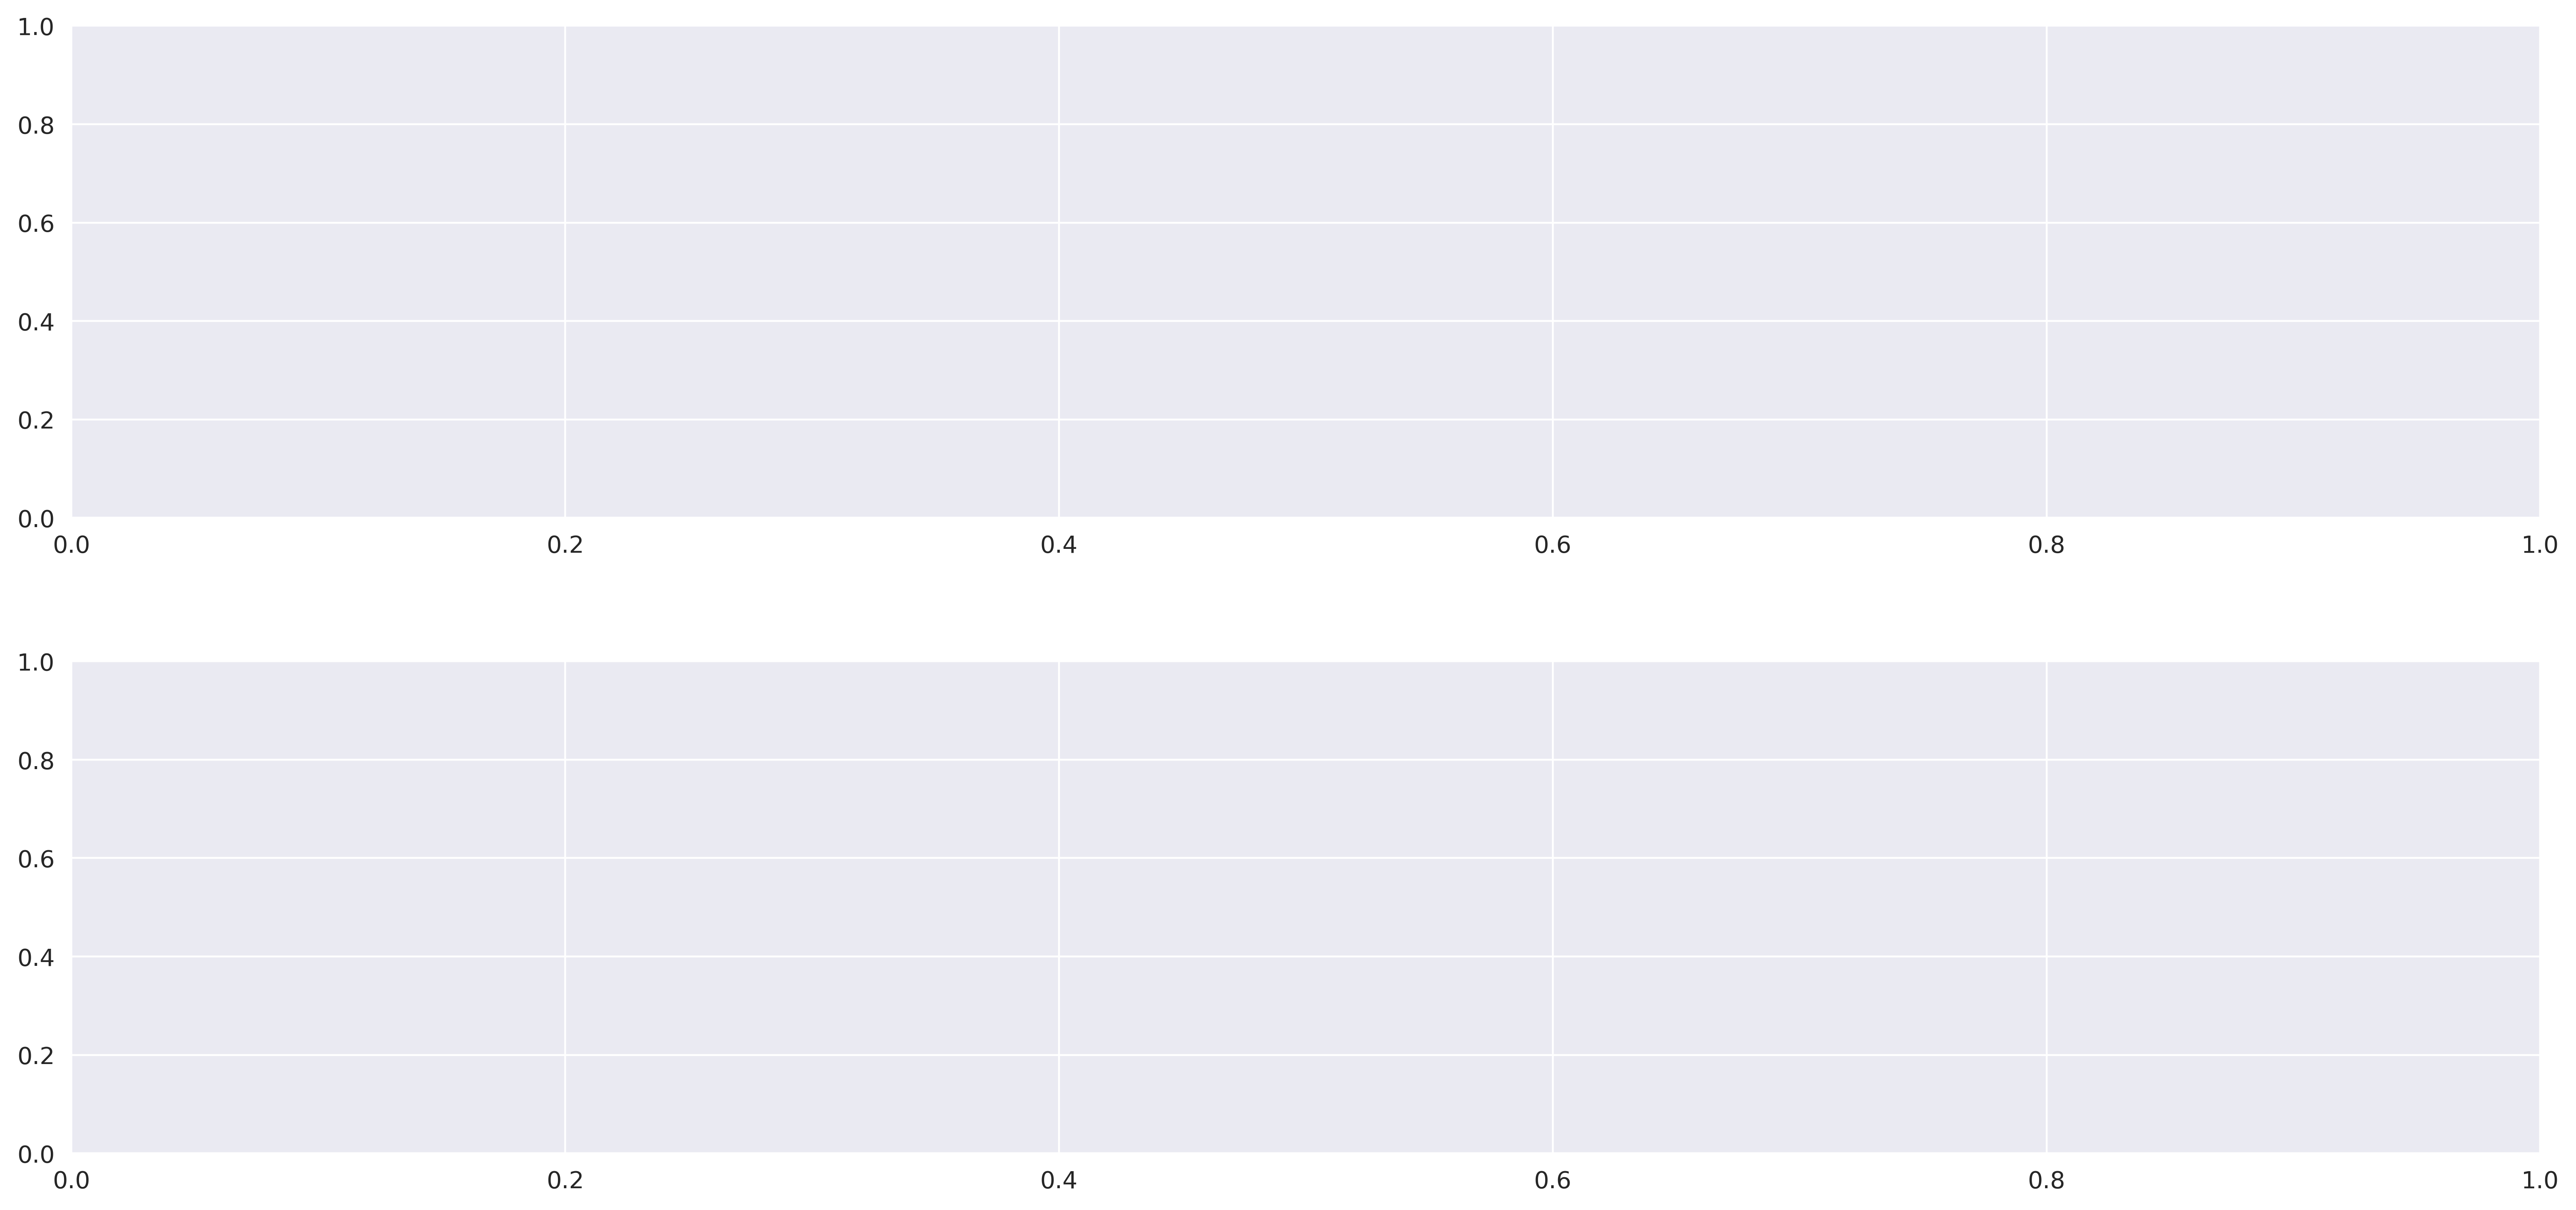

In [9]:
# TODO: live coding!
# for our question, we can plot...
# (1) histogram to see the distribution - directly related to hypothesis testing
# (2) scatterplot to see dates with O3 values that exceed the standard

# first, declare the figure
# syntax: fig, ax = plt.subplots(nrow, ncol, figsize=(width, height), dpi=dots_per_inch)
fig, ax = plt.subplots(2, 1, figsize=(16, 8), dpi=400)

# padding determines the margin between your graphs
# think: what would it look like if pad = 1.0? try it yourself!
plt.tight_layout(pad=4.0)

In [10]:
# imagine you are "storing" your visual in the axes!
print(ax)
print(len(ax))

[<Axes: > <Axes: >]
2


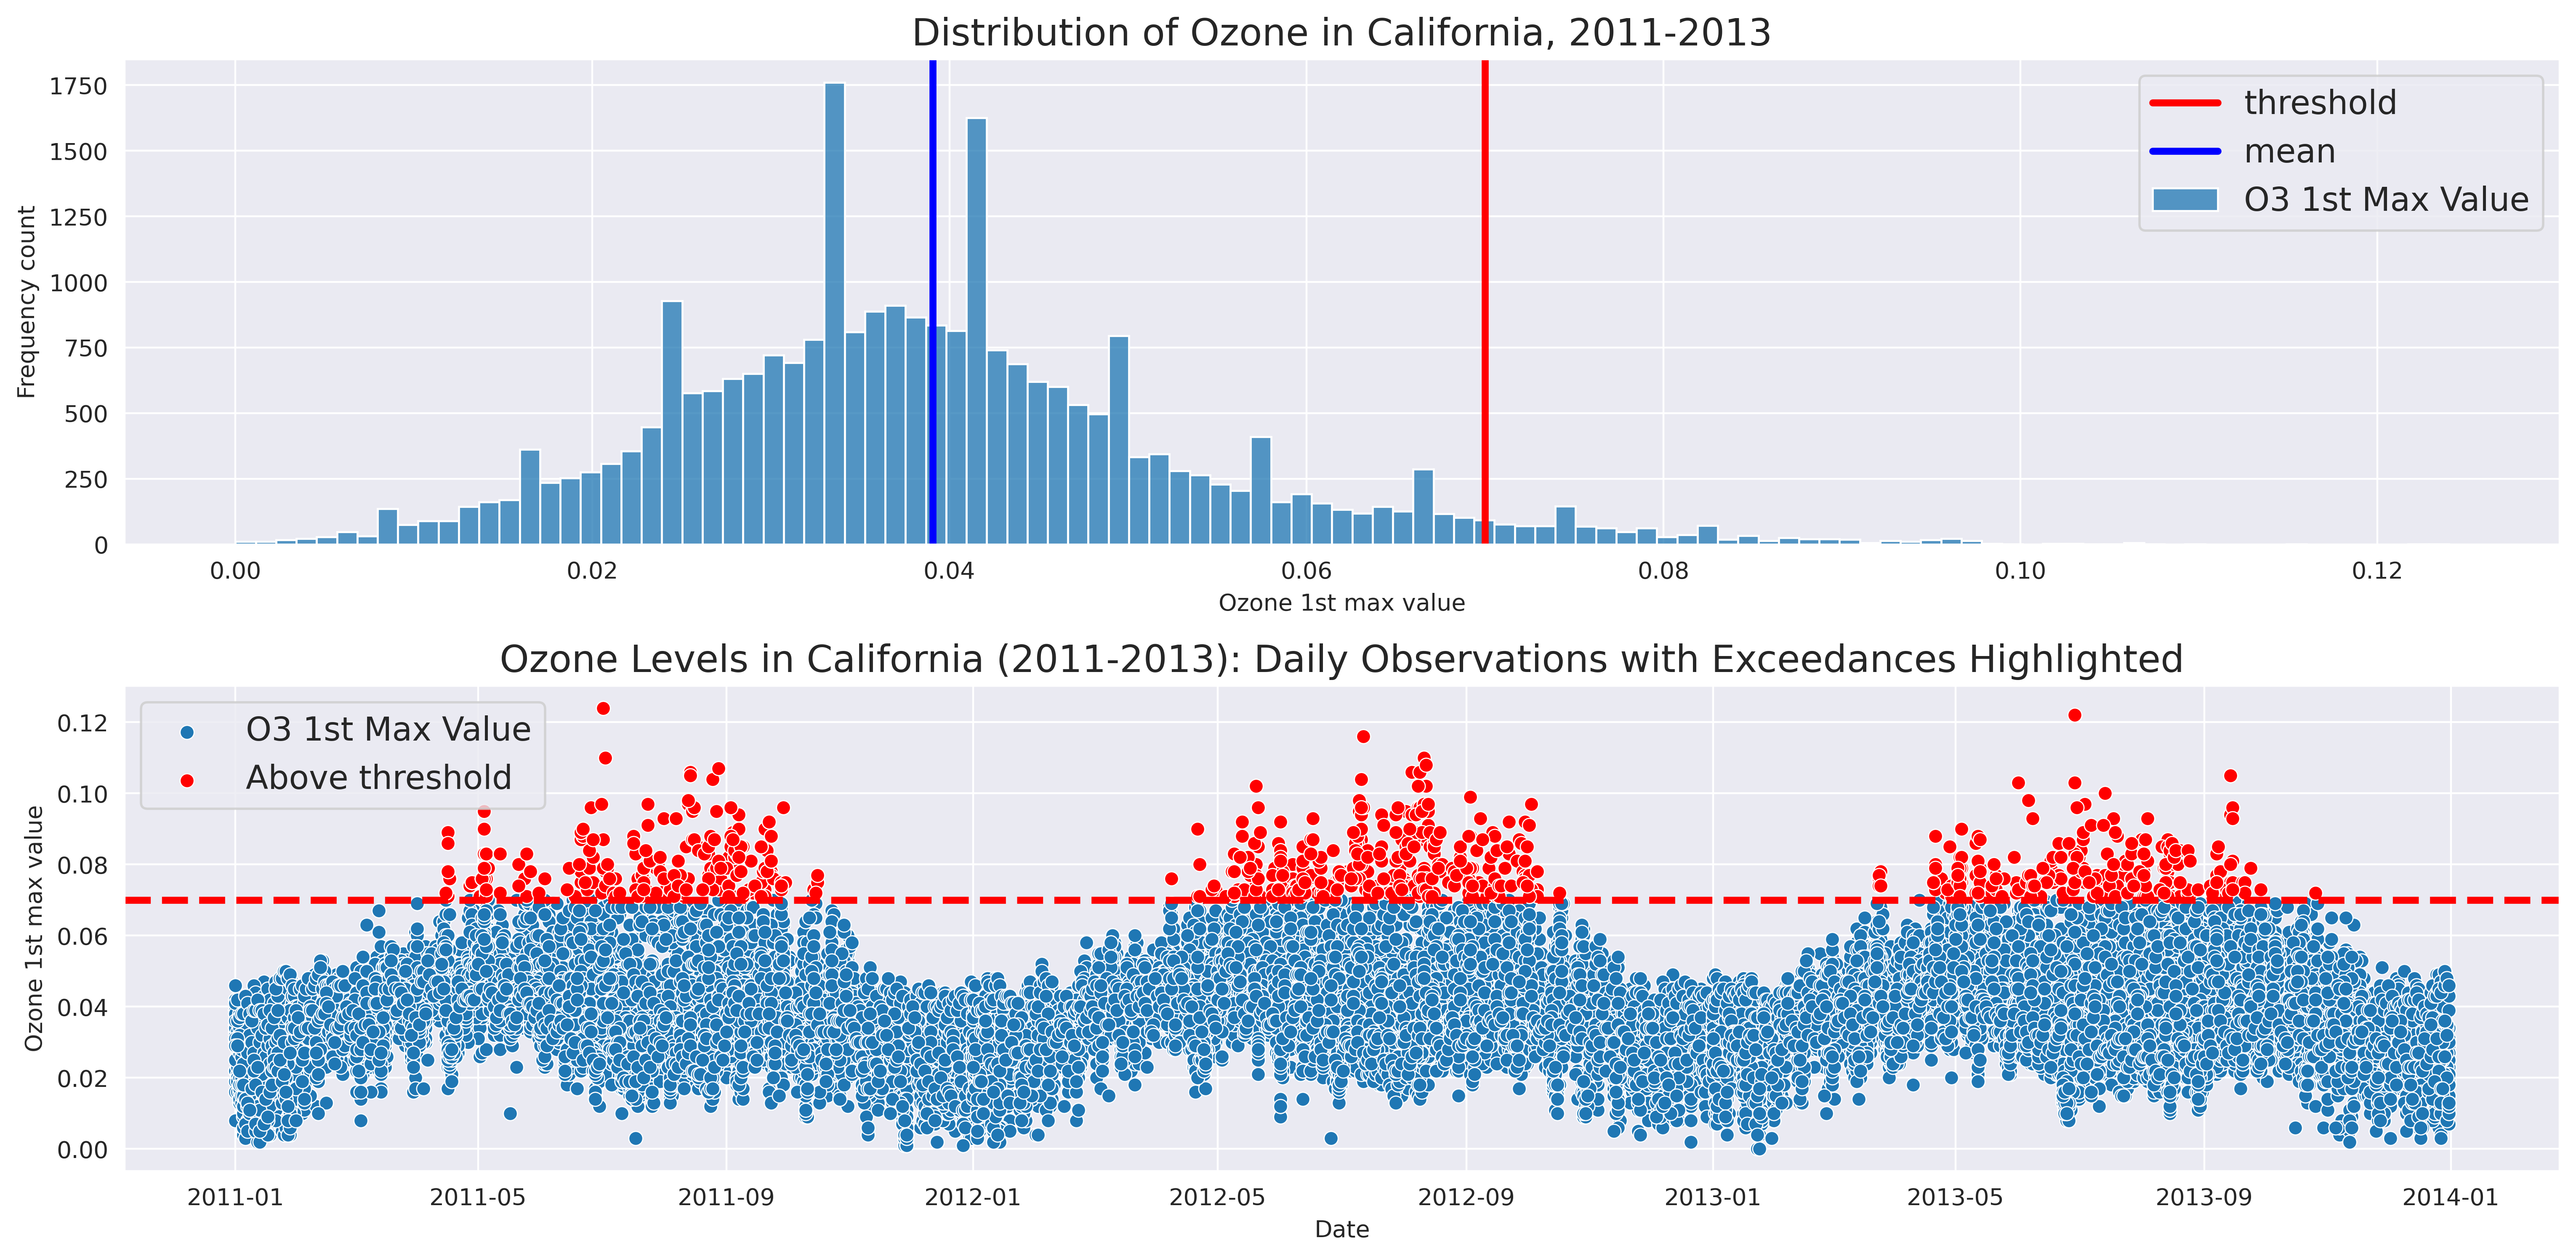

In [12]:
# *full* pipeline
# first, declare the figure
# syntax: fig, ax = plt.subplots(nrow, ncol, figsize=(width, height), dpi=dots_per_inch)
fig, ax = plt.subplots(2, 1, figsize=(16, 8), dpi=400)
plt.tight_layout(pad=4.0)

# next, plot with Seaborn
# (1) histogram to see the distribution - directly related to hypothesis testing
# (2) scatterplot to see dates with O3 values that exceed the standard
# first plot: ax[0] want to see distribution of o3
sns.___(x="o3",
             data=ca_2011_2013,
             label = "O3 1st Max Value",
             ax=ax[0])

# second plot: ax[1] want to dates with O3 values that exceed the standard (0.07)
# step 1: plot scatter plot
# what should the x and y axis be? remember, we want to see what O3 values look over "time"
sns.___(x="___",
                y="___",
                data=ca_2011_2013,
                label="___", # what do we want the legend to say?
                ax=ax[1])

# step 2: we want to "overlay" a scatterplot to highlight the points where O3 value > threshold
sns.___(x="___",
                y="___",
                data=ca_2011_2013[ca_2011_2013['o3']>0.07],
                label="Above threshold",
                color = 'r',
                ax=ax[1])

# don't forget to set labels and titles
ax[0].set_xlabel("Ozone 1st max value")
ax[0].set_ylabel("Frequency count")
ax[0].set_title("Distribution of Ozone in California, 2011-2013",
                fontsize = 16)

ax[1].set_xlabel("Date")
ax[1].set_ylabel("Ozone 1st max value")
ax[1].set_title("Ozone Levels in California (2011-2013): Daily Observations with Exceedances Highlighted",
                fontsize = 16)

# additional annotations
# some variables we might need later
threshold = 0.07
mean_o3 = ca_2011_2013['o3'].mean()
# for the histogram, let's try to annotate the following:
# (a) a vertical line to show the EPA threshold
ax[0].___(x=0.07, linewidth=3, color='r', label = "threshold")

# (b) a vertical line to show the mean of the O3
ax[0].___(x=ca_2011_2013['o3'].mean(), linewidth=3, color='b', label = "mean")

# important line, shows the legend
ax[0].legend(loc=0, fontsize=14)

# for the scatter plot, what do we want to annotate?
_____

# optional: add caption
# caption = "your caption here"
# fig.text(x, y, caption, ha='center')

# TODO: change filename
# save figure
plt.savefig("filename")
# if using Google colab:
# from google.colab import files
# files.download ("filename")

#### step 5: **statistical testing**

In [ ]:
# import 1 sample t-test from scipy
from scipy.stats import t
from scipy.stats import ttest_1samp

# peform one-tailed one-sample t-test
x = ca_2011_2013['o3']
t_stat, p_value = ttest_1samp(a = x,
                              popmean = 0.070,
                              alternative="greater")
print(f"One-sample t-Test results: \nt-statistic = {t_stat:0.3f} \np-value = {p_value}")

In [ ]:
# what if we delete the alternative?
t_stat, p_value = ttest_1samp(a = x,
                              popmean = 0.070)
print(f"One-sample t-Test results: \nt-statistic = {t_stat:0.3f} \np-value = {p_value}")

In [ ]:
# what if we change the alternative to "less"?
t_stat, p_value = ttest_1samp(a = x,
                              popmean = 0.070,
                              alternative="less")
print(f"One-sample t-Test results: \nt-statistic = {t_stat:0.3f} \np-value = {p_value}")

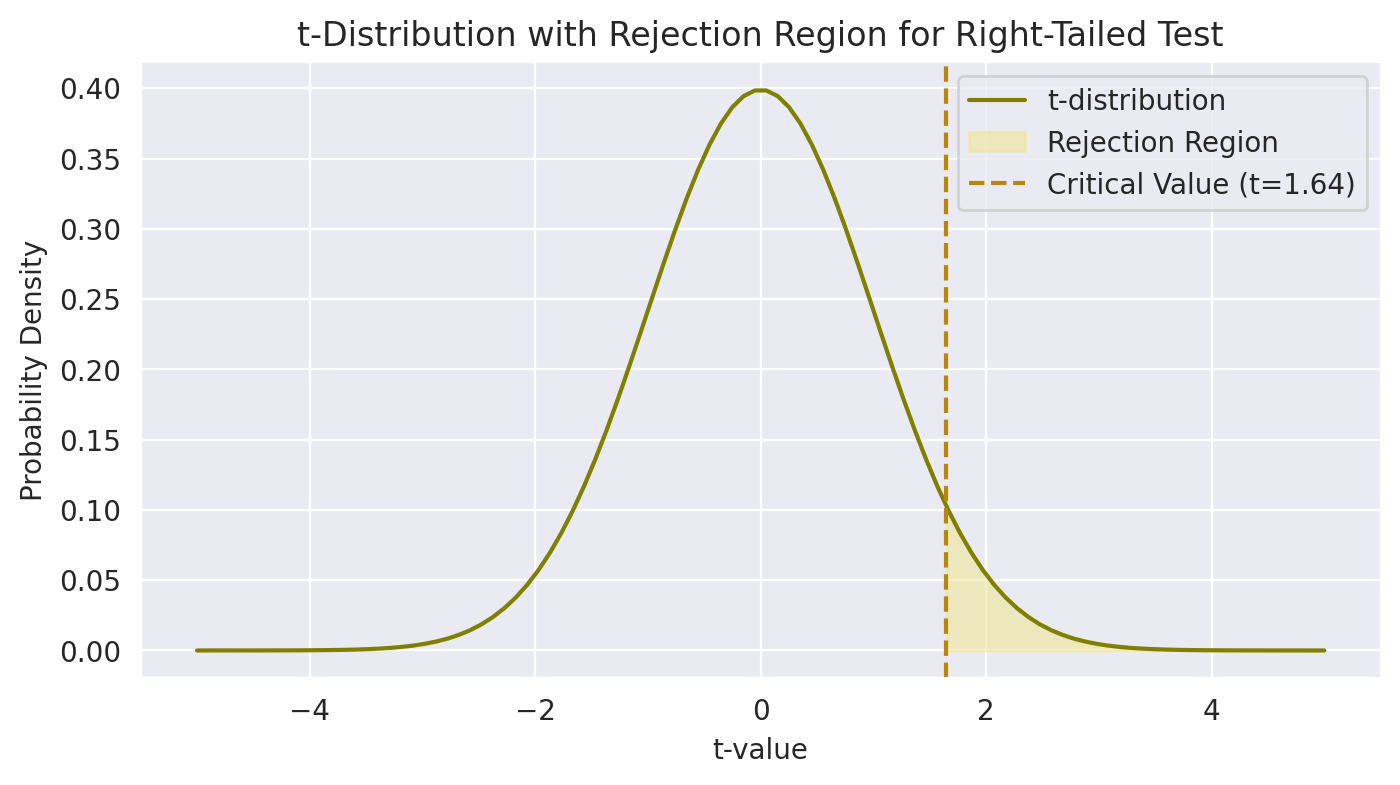

In [16]:
x = ca_2011_2013['o3']
dof = len(x) - 1
x_axis = np.linspace(-5, 5, 100)
y = t.pdf(x_axis, dof)

alpha = 0.05

# Calculate the critical t-value for the right-tailed test
# identical to: critical_value = t.ppf(q = 0.95, df = dof)
critical_value = t.ppf(q = 1 - alpha, df = dof)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)
plt.plot(x_axis, y, label='t-distribution', color='olive')

# Shade the rejection region
x_fill = np.linspace(critical_value, 5, 100)
y_fill = t.pdf(x_fill, dof)
plt.fill_between(x_fill, y_fill, color='khaki', alpha=0.5, label='Rejection Region')

# Add a vertical line at the critical value
plt.axvline(x=critical_value, color='darkgoldenrod', linestyle='--', label=f'Critical Value (t={critical_value:.2f})')

# Add labels and title
plt.title('t-Distribution with Rejection Region for Right-Tailed Test')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#### step 6: **statistical testing**

In [17]:
# TODO: Write your conclusion in the Markdown box below

(your conclusion here)

#### **IMPORTANT NOTE**:
There are several variations to the t-test, such as two-sample t-tests (student's t-test and Welch's t-test for unequal variance). The most important skill here for research is:
1. Look at your data and formulate a research question.
2. Decide the most appropriate statistical test to apply.

If you ever have doubts, always ask! :)

# Appendix 1. Visualization Recipe

Below is a skeleton code for visualizing with Seaborn and Matplotlib, but this is NOT meant for you to follow the format stringently.
```
# skeleton code for plotting in python

# first, declare the figure
fig, ax = plt.subplots(n_row, n_col, figsize = (width, height), dpi = 400)

# next, plot with Seaborn
# note: change the ax=ax[i] argument if you have multiple subplots
sns.histplot(x=iv, data=data, ax=ax)
sns.lineplot(x=iv, y=dv, data=data, label="legend label", ax=ax)
sns.barplot(x=iv, y=dv, data=data, ax=ax)

# don't forget to set labels and titles
# similarly, change ax to ax[i] if you have multiple subplots
ax.set_xlabel("your xlabel here")
ax.set_ylabel("your ylabel here")
ax.set_title("your title here")

# optional: add caption
# similarly, change ax to ax[i] if you have multiple subplots
caption = "your caption here"
ax.text(x, y, caption, ha='center')

# save figure
plt.savefig("filename.png")
# if using Google colab:
files.download("filename.png")
```